# Author : KSHITEEJ CHOURASIA
# GRIP - The Spark Foundation- Data Science & Business Analytics Internship
# July,2021
# Task 1
# To predict the score of a student who studies for 9.25 hrs/ day


** Importing libraries
PANDAS,NUMPY for data manuplation.

Matplotlib,seaborn module for Data Visualisation.

sklearn for modelling **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing dataset

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
scores = pd.read_csv(url)

In [4]:
print("First 5 elements of the given dataset")
scores.head()

First 5 elements of the given dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print('Shape of the Dataset-->',scores.shape)
print ('Columns names -->',scores.columns)
print ('Columns Datatype -->', scores.dtypes)

Shape of the Dataset--> (25, 2)
Columns names --> Index(['Hours', 'Scores'], dtype='object')
Columns Datatype --> Hours     float64
Scores      int64
dtype: object


# Exploratory Analysis of the DataSet
** For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following (i) Missing values (ii) Outliers **

# summary statistics

In [6]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Missing Values

In [7]:
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

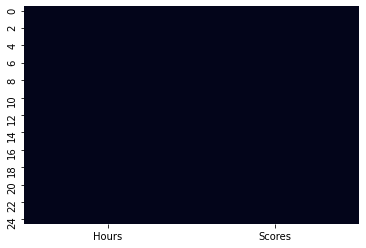

In [8]:
sns.heatmap(scores.isnull(), cbar=False)

# Observations:
There are no missing values in this dataset.


# outliers

In [9]:
#percentile of each Predictor
scores.quantile([0.01,.05,.10,.15 ,.25,.5,.8,.85,0.9,.95,.99,1])

,Hours,Scores
0.01,1.196,17.72
0.05,1.580,20.20
0.10,2.140,22.20
0.15,2.500,24.60
0.25,2.700,30.00
0.50,4.800,47.00
0.80,7.720,77.00
0.85,8.000,82.60
0.90,8.420,85.60
0.95,8.820,87.60


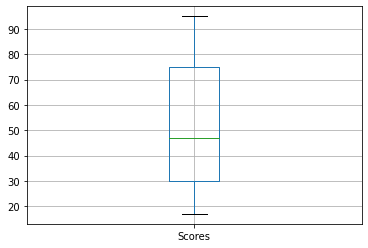

In [10]:
# to check the outliers in the data by plotting the boxplot
scores.boxplot(['Scores'])

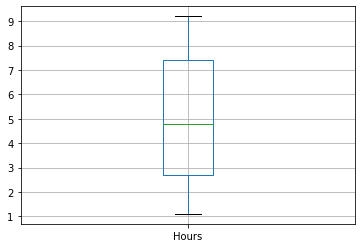

In [11]:
scores.boxplot(['Hours'])

# Observation:
There are no major outliers to be taken care of

# Visualizing Target variable Distribution

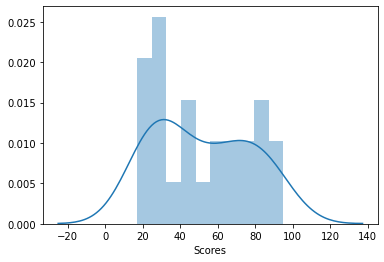

In [12]:
sns.distplot(scores['Scores'], bins=10)
plt.show()

** In the above histogram, we can observe that Scores, there it is almost normally distributed with skew in the positive side Hence, we can perform a LINEAR REGRESSION to predict the values **

# Correlation Matrix

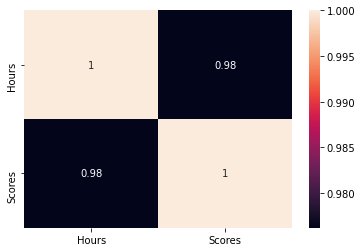

In [14]:
sns.heatmap(scores.corr(),annot=True)

Hours and Scores are highly Positively correlated to each other

# Visualizing Data with Scatter Plots

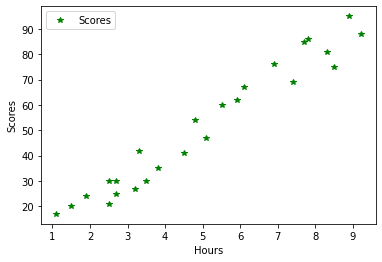

In [15]:
scores.plot(x = 'Hours', y = 'Scores', style = '*',color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Observations
There is positive linear relationship between the number of hours studied and the scores obtained.

# Preparing the training data for Linear Regression
Independent variable = Number of hours studied

Dependent variable = Scores obtained

In [16]:
x=scores.drop("Scores", axis=1)
y=scores['Scores']

# Splitting the dataset for training and testing

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


# Training Linear Regression Model

In [19]:
scores_reg = LinearRegression()
scores_reg.fit(x_train, y_train)

LinearRegression()

# Predicting Scores

In [20]:
y_pred = scores_reg.predict(x_test)
y_pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

# Evaluating Train and Test scores

In [21]:
print('Training Score : ', scores_reg.score(x_train, y_train))
print('Test Score : ', scores_reg.score(x_test, y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


# Comparing Actual Score and Predicted Score

In [22]:
output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
print(output.head())

    Actual Score  Predicted Score  Residual
14            17        11.029003  5.970997
0             21        25.628017 -4.628017
17            24        19.371297  4.628703
6             88        95.494730 -7.494730
23            76        71.510634  4.489366


# To visualize the differences between actual scores and predicted scores, a scatter plot is created
# 1. Training data Scores vs Predicted Scores

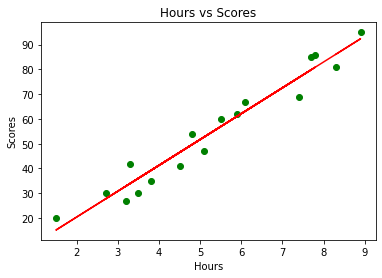

In [23]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, scores_reg.predict(x_train), color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# 2. Testing data Scores vs Predicted Scores

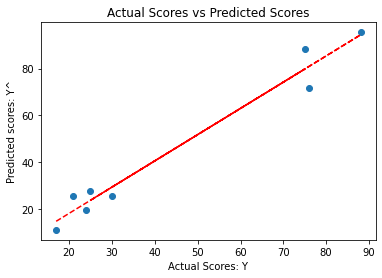

In [24]:
x=y_test
y=y_pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

# Model Evaluation (Actual Vs Predicted) on test sample
We will evaluate our model using error metrics like :

** T-test and F-Test **

# T-TEST

In [25]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> -0.06749127427810271
P-value --> 0.9471450243074203


95% of p-value suggest that the difference between mean of Actual and the Predicted values is close to zero

# F-Test

In [26]:
f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.004555072103682078
P-value --> 0.9471450243074162


F-statistic suggest that the variance of error is random and is in acceptable range with 95% confidance interval

# What will be predicted score if a student study for 9.25 hrs in a day?

In [28]:
study_hours = 9.25
score_pred = scores_reg.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632008


# Another way to calculate the score of the student

In [29]:
#Using the formula y = mx + c , where m = coeffiecient , c = intercept
y = scores_reg.coef_*9.25 + scores_reg.intercept_
y

array([96.016123])